## 特征工程与机器学习模型建模

### 自定义工具函数库

In [1]:
#coding=utf-8
import pandas as pd
import numpy as np
import scipy as sp

# 文件读取（读取+打印数据详情）
def read_csv_file(f,logging=False):
    print("==============================读取数据===========================")
    data = pd.read_csv(f)
    if logging:
        print(f)
        print("包含以下列.....")
        print(data.columns.values)
        print(data.head(5))
        print(data.describe())
        print(data.info())
    return data
 
# 第一级类目获取（二级编码，3位数，获取百位） 处理appCategory
def categories_process_first_class(cate):
    cate = str(cate)         # 如果编号只有1位数，且不为0？？？，这是代表什么情况？不返回值，则默认为NAN
    if len(cate) == 1:
        if int(cate) == 0:  # 编号0表示未知，返回也是0
            return 0
    else:
        return int(cate[0])  # 返回的int， 为什么会有小数点？？
    
# 第二级类目获取（二级编码，3位数，获取十位和个位） 处理appCategory
def categories_process_second_class(cate):
    cate = str(cate)
    if len(cate)<3
        return 0
    else:
        return int(cate[1:])    # 02 获取到后是2

# 年龄处理，切段0,1-14,15-24,25-39,40-59,60-
def age_process(age):
    age = int(age)
    if age == 0:
        return 0
    elif age < 15:
        return 1
    elif age < 25:
        return 2
    elif age < 40:
        return 3
    elif age < 60:
        return 4
    else:
        return 5
    
# 省份处理  hometown特征
def process_province(hometown):
    hometown = str(hometown)
    province = int(hometown[0:2]) # 万一要是为空呢，不用加判断吗？
    return province

# 城市处理  hometown特征
def process_city(hometown):
    hometown = str(hometown)
    if len(hometown)> 2:        # 这个不应该是>2吗
        city = int(hometown[2:])
    else:
         city = 0
    return city

# 几点钟 DDHHMM
def get_time_day(t):
    t = str(t)
    t = int(t[0:2])
    return t

# 一天切切成4个时间段,0-6, 6-12, 12-18, 18-24
def get_time_hour(t):
    t = str(t)
    t = int(t[2:4])
    if t < 6:   
        return 0
    elif t < 12:
        return 1
    elif t < 18:
        return 2
    else:
        return 3

# 评估与计算logloss
def logloss(act,pred):  # 这个不应该是要有循环吗？act?
    epsilon = le-15
    pred = sp.maximum(epsilon,pred)
    pred = sp.minimum(1-epsilon,pred)
    l1 = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    l1 = l1* -1/len(act)
    return l1

### 特征工程+随机森林

#### import库

In [2]:
# coding=utf-8
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

#### 读取各部分数据，并分别进行处理好

##### 读取train_data和ad

In [3]:
data_root = "E:/E_datas/tencentCvrConvertPrediton_7_8"
#['label' 'clickTime' 'conversionTime' 'creativeID' 'userID' 'positionID' 'connectionType' 'telecomsOperator']
train_data = read_csv_file(data_root+"/train.csv",logging=True)

#['creativeID' 'adID' 'camgaignID' 'advertiserID' 'appID' 'appPlatform']
ad = read_csv_file(data_root+"/ad.csv",logging=True)

==============================读取数据===========================
E:/E_datas/tencentCvrConvertPrediton_7_8/train.csv
==============================我是萌哒哒的分界线====================
E:/E_datas/tencentCvrConvertPrediton_7_8/train.csv
包含以下列.....
['label' 'clickTime' 'conversionTime' 'creativeID' 'userID' 'positionID'
 'connectionType' 'telecomsOperator']
   label  clickTime  conversionTime  creativeID   userID  positionID  \
0      0     170000             NaN        3089  2798058         293   
1      0     170000             NaN        1259   463234        6161   
2      0     170000             NaN        4465  1857485        7434   
3      0     170000             NaN        1004  2038823         977   
4      0     170000             NaN        1887  2015141        3688   

   connectionType  telecomsOperator  
0               1                 1  
1               1                 2  
2               4                 1  
3               1                 1  
4               1              

##### 读取app

In [ ]:
app_categories.describe()
app_categories = read_csv_file(data_root+"/app_categories.csv",logging=True)
app_categories["app_categories_first_class"] = app_categories['appCategory'].apply(categories_process_first_class)
app_categories["app_categories_second_class"] = app_categories['appCategory'].apply(categories_process_second_class)

In [5]:
app_categories.head()

appID  appCategory  app_categories_first_class  app_categories_second_class
0     14            2                         NaN                            0
1     25          203                         2.0                            3
2     68          104                         1.0                            4
3     75          402                         4.0                            2
4     83          203                         2.0                            3

##### 读取user

In [6]:
user = read_csv_file(data_root+"/user.csv",logging=True)
user["age_process"] = user['age'].apply(age_process)
user["hometown_province"] = user["hometown"].apply(process_province)
user["hometown_city"] = user["hometown"].apply(process_city)
user["residence_province"] = user["residence"].apply(process_province)
user["residence_city"] = user["residence"].apply(process_city)  # residence是省市的交叉特征，需保留

==============================读取数据===========================
E:/E_datas/tencentCvrConvertPrediton_7_8/user.csv
==============================我是萌哒哒的分界线====================
E:/E_datas/tencentCvrConvertPrediton_7_8/user.csv
包含以下列.....
['userID' 'age' 'gender' 'education' 'marriageStatus' 'haveBaby'
 'hometown' 'residence']
   userID  age  gender  education  marriageStatus  haveBaby  hometown  \
0       1   42       1          0               2         0       512   
1       2   18       1          5               1         0      1403   
2       3    0       2          4               0         0         0   
3       4   21       2          5               3         0       607   
4       5   22       2          0               0         0         0   

   residence  
0        503  
1       1403  
2          0  
3        607  
4       1301  
             userID           age        gender     education  marriageStatus  \
count  2.805118e+06  2.805118e+06  2.805118e+06  2.805118e+06    2.

In [7]:
user.head()

userID  age  gender  education  marriageStatus  haveBaby  hometown  \
0       1   42       1          0               2         0       512   
1       2   18       1          5               1         0      1403   
2       3    0       2          4               0         0         0   
3       4   21       2          5               3         0       607   
4       5   22       2          0               0         0         0   

   residence  age_process  hometown_province  hometown_city  \
0        503            4                 51              2   
1       1403            2                 14              3   
2          0            0                  0              0   
3        607            2                 60              7   
4       1301            2                  0              0   

   residence_province  residence_city  
0                  50               3  
1                  14               3  
2                   0               0  
3                  60               7  
4                  13               1

#### 合并数据

In [8]:
# train data
train_data["clickTime_day"] = train_data["clickTime"].apply(get_time_day)
train_data["clickTime_hour"] = train_data["clickTime"].apply(get_time_hour)
# train_data["conversionTime_day"] = train_data["conversionTime"].apply(get_time_day)
# train_data["conversionTime_hour"] = train_data["conversionTime"].apply(get_time_hour)

# test_data
test_data = read_csv_file(data_root+"/test.csv",True)
test_data["clickTime_day"] = test_data["clickTime"].apply(get_time_day)
test_data["clickTime_hour"] = test_data["clickTime"].apply(get_time_hour)
# test_data["conversionTime_day"] = test_data["conversionTime"].apply(get_time_day)
# test_data["conversionTime_hour"] = test_data["conversionTime"].apply(get_time_hour)


# trian_user_ad_app
train_user = pd.merge(train_data,user,on="userID")
train_user_ad = pd.merge(train_user,ad,on="creativeID")
train_user_ad_app = pd.merge(train_user_ad,app_categories,on="appID")

==============================读取数据===========================
E:/E_datas/tencentCvrConvertPrediton_7_8/test.csv
==============================我是萌哒哒的分界线====================
E:/E_datas/tencentCvrConvertPrediton_7_8/test.csv
包含以下列.....
['instanceID' 'label' 'clickTime' 'creativeID' 'userID' 'positionID'
 'connectionType' 'telecomsOperator']
   instanceID  label  clickTime  creativeID   userID  positionID  \
0           1     -1     310000        3745  1164848        3451   
1           2     -1     310000        2284  2127247        1613   
2           3     -1     310000        1456  2769125        5510   
3           4     -1     310000        4565     9762        4113   
4           5     -1     310000          49  2513636        3615   

   connectionType  telecomsOperator  
0               1                 3  
1               1                 3  
2               2                 1  
3               2                 3  
4               1                 3  
          instanceID   

In [9]:
train_user_ad_app.head()

label  clickTime  conversionTime  creativeID   userID  positionID  \
0      0     170000             NaN        3089  2798058         293   
1      0     170001             NaN        3089   195578        3659   
2      0     170014             NaN        3089  1462213        3659   
3      0     170030             NaN        3089  1985880        5581   
4      0     170047             NaN        3089  2152167        5581   

   connectionType  telecomsOperator  clickTime_day  clickTime_hour  ...  \
0               1                 1             17               0  ...   
1               0                 2             17               0  ...   
2               0                 3             17               0  ...   
3               1                 1             17               0  ...   
4               1                 1             17               0  ...   

   residence_province  residence_city  adID  camgaignID  advertiserID  appID  \
0                  13               1  1321          83            10    434   
1                  13               1  1321          83            10    434   
2                  13               1  1321          83            10    434   
3                   0               0  1321          83            10    434   
4                  13               3  1321          83            10    434   

   appPlatform  appCategory  app_categories_first_class  \
0            1          108                         1.0   
1            1          108                         1.0   
2            1          108                         1.0   
3            1          108                         1.0   
4            1          108                         1.0   

   app_categories_second_class  
0                            8  
1                            8  
2                            8  
3                            8  
4                            8  

[5 rows x 30 columns]

#### 取出特征数据和label

In [10]:
train_user_ad_app.columns

Index(['label', 'clickTime', 'conversionTime', 'creativeID', 'userID',
       'positionID', 'connectionType', 'telecomsOperator', 'clickTime_day',
       'clickTime_hour', 'age', 'gender', 'education', 'marriageStatus',
       'haveBaby', 'hometown', 'residence', 'age_process', 'hometown_province',
       'hometown_city', 'residence_province', 'residence_city', 'adID',
       'camgaignID', 'advertiserID', 'appID', 'appPlatform', 'appCategory',
       'app_categories_first_class', 'app_categories_second_class'],
      dtype='object')

In [30]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
# 特征部分
x_user_ad_app = train_user_ad_app.loc[:,['creativeID', 'userID','residence',
       'positionID', 'connectionType', 'telecomsOperator', 'clickTime_day',
       'clickTime_hour', 'age', 'gender', 'education', 'marriageStatus',
       'haveBaby', 'age_process', 'hometown_province',
       'hometown_city', 'residence_province', 'residence_city', 'adID', 'camgaignID',
       'advertiserID', 'appID', 'appPlatform', 'app_categories_first_class', 'app_categories_second_class']]
x_user_ad_app = x_user_ad_app.values
x_user_ad_app = np.array(x_user_ad_app,dtype='int32')  #送进模型前需将pd.dataFrame格式的values转换为np.array格式

# 标签部分
y_user_ad_app = train_user_ad_app.loc[:,['label']].values

### 随机森林建模&&特征重要度排序

In [34]:
# # 用lgb计算特征重要度
# %matplotlib inline
# import matplotlib.pyplot as plt
# print('Plot feature importances...')
# ax = lgb.plot_importance(gbm,max_num_features=10)
# plt.show()

#用RF计算特征重要度
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,train_test_split

feat_labels = np.array(['creativeID', 'userID','residence',
       'positionID', 'connectionType', 'telecomsOperator', 'clickTime_day',
       'clickTime_hour', 'age', 'gender', 'education', 'marriageStatus',
       'haveBaby', 'age_process', 'hometown_province',
       'hometown_city', 'residence_province', 'residence_city', 'adID', 'camgaignID',
       'advertiserID', 'appID', 'appPlatform', 'app_categories_first_class', 'app_categories_second_class'])

forest = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
forest.fit(x_user_ad_app,y_user_ad_app.reshape(y_user_ad_app.shape[0],))
importances = forest.feature_importances_   #这个importances的结构是一个以indexs为索引，对应的特征名为值得dict
                                            # 这个indexs是按照feat_labels特征名列表的顺序，从0开始编号的
indices = np.argsort(importances)[::-1]  # 对传入的array-like根据值大小进行排序，并返回排序后索引array(一般索引是对应的字段名)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

 1) userID                         0.165486
 2) positionID                     0.099520
 3) clickTime_day                  0.077150
 4) age                            0.075425
 5) residence                      0.065234
 6) residence_province             0.064126
 7) residence_city                 0.057890
 8) hometown_province              0.054209
 9) education                      0.048758
10) hometown_city                  0.048347
11) clickTime_hour                 0.038930
12) telecomsOperator               0.033759
13) marriageStatus                 0.031603
14) creativeID                     0.028358
15) adID                           0.019075
16) haveBaby                       0.018623
17) age_process                    0.015542
18) camgaignID                     0.015281
19) gender                         0.013152
20) advertiserID                   0.008175
21) app_categories_second_class    0.006369
22) appID                          0.006360
23) connectionType              

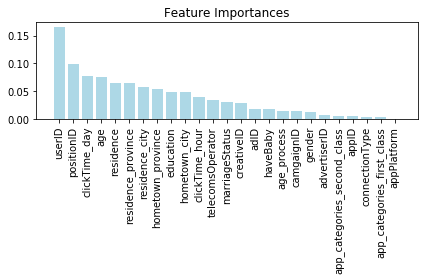

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
for f in range(x_user_ad_app.shape[1]):
    print("%2d) %-*s %f" % (f + 1,30, feat_labels[indices[f]],importances[indices[f]]))
plt.title('Feature Importances')
plt.bar(range(x_user_ad_app.shape[1]), importances[indices],color='lightblue',align='center')
plt.xticks(range(x_user_ad_app.shape[1]),feat_labels[indices],rotation=90)
plt.tight_layout()
# plt.savefig("./random_forest.png",dpi=300)
plt.show()       

### 随机森林调参

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [100],
#     'n_estimators': [10,100,500,1000],
    'max_features': [0.6, 0.7, 0.8, 0.9]
}

rf = RandomForestClassifier()
rfc = GridSearchCV(rf,param_grid,scoring = 'neg_log_loss',cv=3,n_jobs=-1)
rfc.fit(x_user_ad_app,y_user_ad_app.reshape(y_user_ad_app.shape[0],))
print(rfc.best_score_)
print(rfc.best_params_)

### Xgboost调参

In [ ]:
import xgboostboost as xgb

In [ ]:
import os
import numpy as np
from sklearnearnearnearnearn.model_selection import GridSearchCV
import xgboost as xgb
os.environ["OMP_NUM_THREADS"] = "8" # 并行训练
rng = np.random.RandomState(4315)
import warnings
warnings.filterwarnings("ignore")

param_grid = {
    'max_depth': [3, 5, 7, 9]
    'n_estimators': [10, 50, 100, 400, 800, 1000, 1200]
    'learning_rate': [0.1, 0.2, 0.3]
    'gamma': [0. 0.2]
    'subsample': [0.8, 1]
    'colsample_bylevel': [0.8, 1]
}

xgb_model = xgb.()
rgs = GridSearchCV(xgb_model, param_grid, n_jobs=8)
rgs.fit(X,y)
print(rgs.best_score_)
pring(rgs.best_param_)

### 正负样本比例

In [ ]:
positive_num = train_user_ad_app[train_user_ad_app['label']==1].values.shape[0]
negative_num = train_user_ad_app[train_user_ad_app['label']==0].values.shape[0]
negative_num/float(positive_num)

我们可以看到正负样本数量相差非常大，数据严重unbalanced<br>
我们用bagging修正过，处理不均衡样本的B(I)agging来进行训练和实验

In [ ]:
from blagging import BlaggingClassifier

In [ ]:
# help(BlaggingClassifier)

In [ ]:
# 处理unbalance的classifier
classifier.fit(x_user_ad_app, y_user_ad_app)

### 预测

In [ ]:
test_data = pd.merge(test_data, user,on='userID')
test_user_ad = pd.merge(test_data,ad,on="creativeID")
test_data = pd.merge(test_data,app_categories,on="appID")

x_test_clean = test_user_ad_app.loc[:,['creativeID','userID','positionID',
 'connectionType','telecomsOperator','clickTime_day','clickTime_hour','age', 'gender' ,'education',
 'marriageStatus' ,'haveBaby' , 'residence' ,'age_process',
 'hometown_province', 'hometown_city','residence_province', 'residence_city',
 'adID', 'camgaignID', 'advertiserID', 'appID' ,'appPlatform' ,
 'app_categories_first_class' ,'app_categories_second_class']].values

x_test_clean = np.array(x_test_clean,dytype='int32')

result_predict_prob = []
result_predict = []
for i in range(scale):
    result_indiv = clfs